# Practical Session 3
## Biomedical Signals and Images
## Biomedical Image Processing (Image enhancement, Filtering and Segmentation)
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

[Mumtaz Hussain Soomro](http://www.etrovub.be/mhsoomro), [Jakub Ceranka](http://www.etrovub.be/jceranka) and [Jef Vandemeulebroucke](http://www.etrovub.be/JefVandemeulebroucke)

#### Student Names and IDs: Sajjad Mahmoudi 573106 - Somayyeh Gholami 562113 

### Purpose
The purpose of this exercise session is to obtain insight in the image enhancement, filtering and segmentation operations commonly applied in medical image processing. For more information on these concepts see the course slides and the related material.

The jupyter notebook should be submitted as the report of each practical session by teams of two students. In [colab](https://colab.research.google.com/notebooks/welcome.ipynb) you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The deadline for the report submission is December 10, 2020, at 23.59.

Any report sent after the deadline will not be graded. 

### Required modules
- [numpy](https://pypi.org/project/numpy/)
- [pylab](https://scipy.github.io/old-wiki/pages/PyLab)
- [scipy](https://www.scipy.org/getting-started.html)
- [skimage](https://scikit-image.org/docs/dev/api/skimage.html#module-skimage)
- [math](https://docs.python.org/3/library/math.html)
- [sklearn](https://scikit-learn.org/stable/index.html)
- [Matplotlib](https://matplotlib.org/3.1.1/index.html)

### 1 Image enhancement
#### 1.1 The image histogram
The histogram is a representation of how many pixels have a certain intensity in the corresponding image. Medical images can however have a large intensity range, or even floating point intensities, making the pixel count per intensity low or impractical. In practice, intensities are therefore usually binned, i.e. grouped in a reduced number of bins with similar intensity.
#### 1.2  Image enhancement
We shall discuss two ways of contrast improvement. The first is [linear contrast mapping](http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) or [histogram stretching](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html), which involves a linear transformation on the image intensities, such that the transformed intensities cover to the full range.
Another way to improve the contrast is to perform [histogram equalisation](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html). In this case, the aim is to obtain a uniform histogram, in which all intensities are equally represented. This can be done by applying a nonlinear transformation on the image intensities. It can be shown that the transform corresponds to the cumulative histogram.

#### Example 1: Linear contrast mapping 

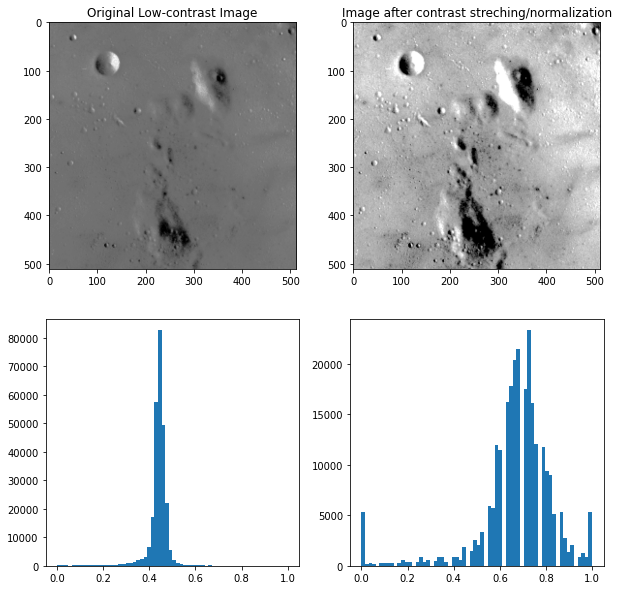

In [ ]:
import numpy as np
from skimage import data, img_as_float
from pylab import show,title,figure,imshow,subplot,subplots_adjust, hist

# Load an example image
low_contrast_image = data.moon()

"contrast stretching (i.e., normalization),"
"where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles." 
    
p2, p98                  = np.percentile(low_contrast_image , (2, 98))  

i_min, i_max             = p2,p98

image_cliping            = np.clip(low_contrast_image , i_min,i_max)

image_constrast_streched = (image_cliping - i_min) / float(i_max - i_min) 

"Displaying low contrast image, contrast-enhanced image and their corresponding histogrms"

h,w=2,2    # figure height and width 
figure(figsize=(10,10))
subplots_adjust(hspace=.2)

subplot(h,w,1)
imshow(low_contrast_image , cmap='gray')
title('Original Low-contrast Image')

subplot(h,w,2)
imshow(image_constrast_streched, cmap='gray')
title('Image after contrast streching/normalization')

subplot(h,w,3)
hist(img_as_float(low_contrast_image).ravel(),bins=64) #plotting histogram of original low-contrast image

subplot(h,w,4)
hist(image_constrast_streched.ravel(),bins=64)#plotting histogram of contrast streched/normalized image
show()

#### Exercise 1.1: Linear contrast mapping
By following above example 1, solve the below exercise. 

- Read an image (Brain.tiff) 
  
  hint: user can load the image in different ways, like: [skimage.io.imread](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread), [plt.imread](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html), [imread](https://pypi.org/project/imread/)
  
  preferable: from imread import imread. Install imread with pip install imread
- Perform linear contrast mapping (contrast streching/normalization)
- Display input image, output image (after linear contrast mapping), their corresponding histograms with 64 bins in a 2x2 figure. 

#### Report
- Look at the output result and its histogram. Compare it with the histogram of the original input image. Comment about difference between them. 

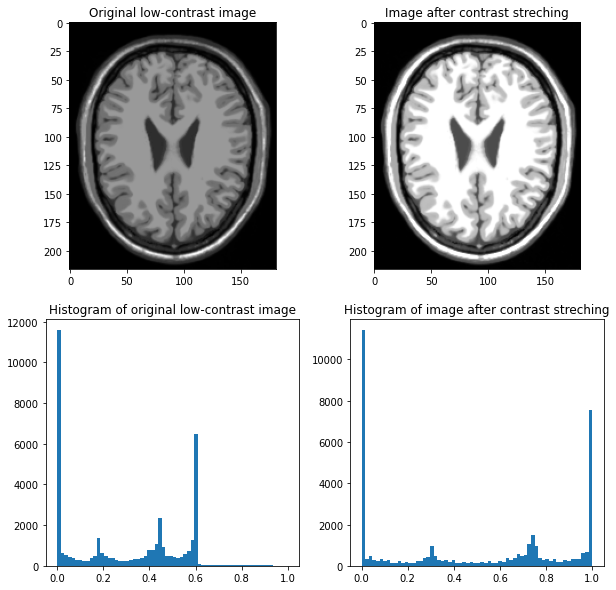

In [ ]:
#!pip install imread
#from google.colab import drive

from imread import imread
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from pylab import show,title,figure,imshow,subplot,subplots_adjust, hist
from skimage import img_as_float

brain = imread('Brain.tiff')
p2, p98 = np.percentile(brain , (2, 98))  
i_min, i_max = p2,p98
cliped_brain = np.clip(brain , i_min,i_max)
contrast_streched_brain = (cliped_brain - i_min) / float(i_max - i_min) 

h,w = 2,2 
figure(figsize = (10,10))
subplots_adjust(hspace = 0.2)

subplot(h,w,1)
imshow(brain , cmap='gray')
title('Original low-contrast image')

subplot(h,w,2)
imshow(contrast_streched_brain, cmap='gray')
title('Image after contrast streching')

subplot(h,w,3)
hist(img_as_float(brain).ravel(),bins=64) 
title('Histogram of original low-contrast image')

subplot(h,w,4)
hist(contrast_streched_brain.ravel(),bins=64)
title('Histogram of image after contrast streching')
show()

Comment: It is obviously visible the contrast between black and white colours is improved. The normalisation which is done on the original image
improves the contrast by rearranging the intensities of the original image to a full range.

#### Example 2: Histogram equalisation
Students are suggested to have a look into [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) for a calculation of histogram.

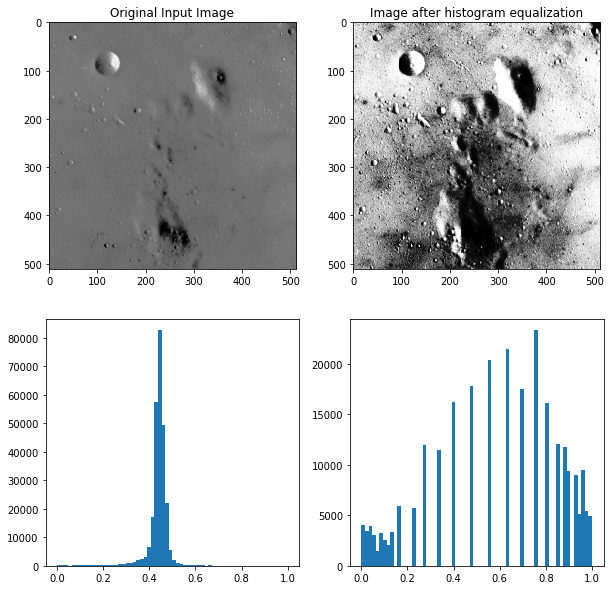

In [ ]:
import numpy as np
from skimage import data, img_as_float
import pylab
from pylab import show,title,figure,imshow,subplot,subplots_adjust

"Load an example image"
image = data.moon()

"calculation of histogram"
hist, bin_edges = np.histogram(image.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = hist.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(image.flat, bin_centers, img_cdf)
img_eq = out.reshape(image.shape)

"Displaying input image, image-histogram equalized and their corresponding histogrms"

h,w=2,2    # figure height and width 
figure(figsize=(10,10))
subplots_adjust(hspace=.2)

subplot(h,w,1)
imshow(image , cmap='gray')
title('Original Input Image')

subplot(h,w,2)
imshow(img_eq, cmap='gray')
title('Image after histogram equalization')

subplot(h,w,3)
pylab.hist(img_as_float(image).ravel(),bins=64) #plotting histogram of original image

subplot(h,w,4)
pylab.hist(img_eq.ravel(),bins=64)#plotting histogram of histogram-equalized image
show()



#### Exercise 1.2: Histogram equalization 
By following the example 2, solve the below exercise. 

- Read an image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
  
  eg: from imread import imread
  
  
- Perform histogram equalization [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)
- Display input image, output image (after linear contrast mapping) of exercise 1.1, output image (histogram-equalized), their corresponding histograms with 64 bins in a 3x3 figure. 

#### Report
- Look at the output results and their histograms. Compare them with the histogram of the original input image. The histogram of the histogram-equalized output image is not perfectly uniform. What is the reason for this? 

Text(0.5, 1.0, 'Histogram of image after histogram equalization')

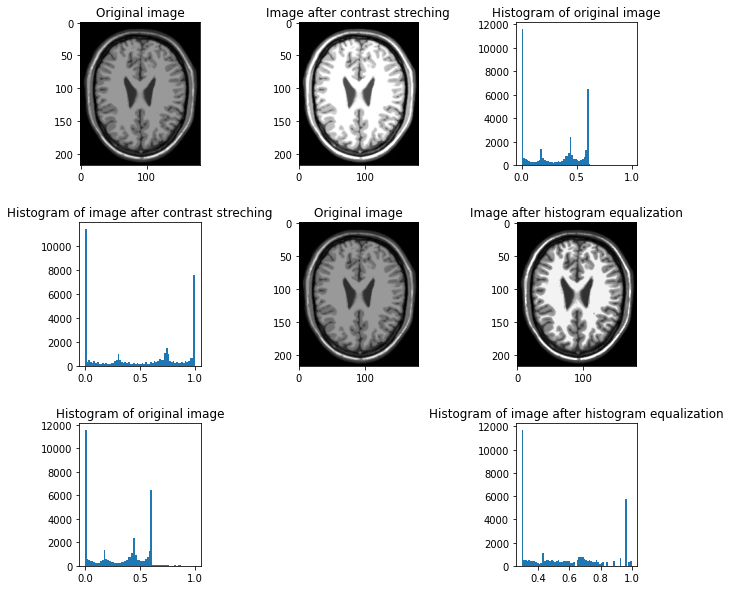

In [ ]:
from imread import imread
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pylab
from pylab import show,title,figure,imshow,subplot,subplots_adjust, hist
from skimage import img_as_float

brain = imread('Brain.tiff')

h,w = 3,3
figure(figsize = (10,10))
subplots_adjust(hspace = 0.4, wspace=0.8)

p2, p98 = np.percentile(brain , (2, 98))  
i_min, i_max = p2,p98
cliped_brain = np.clip(brain , i_min,i_max)
contrast_streched_brain = (cliped_brain - i_min) / float(i_max - i_min) 
subplot(h,w,1)
imshow(brain , cmap='gray')
title('Original image')
subplot(h,w,2)
imshow(contrast_streched_brain, cmap='gray')
title('Image after contrast streching')
subplot(h,w,3)
hist(img_as_float(brain).ravel(),bins=64) 
title('Histogram of original image')
subplot(h,w,4)
hist(contrast_streched_brain.ravel(),bins=64)
title('Histogram of image after contrast streching')

hist, bin_edges = np.histogram(brain.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = hist.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(brain.flat, bin_centers, img_cdf)
img_eq = out.reshape(brain.shape)
subplot(h,w,5)
imshow(brain , cmap='gray')
title('Original image')
subplot(h,w,6)
imshow(img_eq, cmap='gray')
title('Image after histogram equalization')
subplot(h,w,7)
pylab.hist(img_as_float(brain).ravel(),bins=64) 
title('Histogram of original image')
subplot(h,w,9)
pylab.hist(img_eq.ravel(),bins=64)
title('Histogram of image after histogram equalization')


Comment: I beleive the method, histogram equalisation, does not get a uniform histogram while it should be, because the range of intensities in the original image histogram are so different that they can not be equally represented. So, it seems that this method would be more helpful with the images of which intensities are not too inconsistent.

### 2 Image Denoising
Filters are used in medical imaging to enhance or suppress certain features of images. They may be used to improve the image quality before reviewing them, or as a preprocessing step to improve the result of further image processing steps such as segmentation.
For many filters, the extent of the neighbourhood considered for each pixel is determined by a spatial filter mask (kernel). The weights of the mask can be combined with the underlying pixels in a linear way, in which case this comes down to a convolution of the mask and image. Other filters however exist, based on non-linear operations.
#### 2.1 Noise suppression
An important processing task is the suppression of noise, either for enhanced visualization or for improving the result of further processing. Noise can often be assumed to be a high frequency signal. Many noise reduction approaches are therefore based on attenuating the high frequency components while preserving the low frequency components. A popular linear filter for this purpose is the (2D) Gaussian filter.
Low pass filtering for noise suppression has the side effect of blurring the edges of an image, which is often undesirable. Smoothing filters that preserve the edges of an image have therefore been proposed, such as the non-linear median filter.
#### 2.2 Edge enhancement
Image filtering can also be used for the enhancement or detection of edges. The goal of such filters is often to enhance the edge contrast of an image in an attempt to improve its apparent sharpness. If the final goal is to retain an edge image, i.e. a binary image in which only the edges are preserved, the operation is termed edge detection. Such images can later on serve as inputs for further image processing steps such as segmentation.

#### Example 3: Image denoising by different filters (i.e, [Gaussian filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html), [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) and [average filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html))

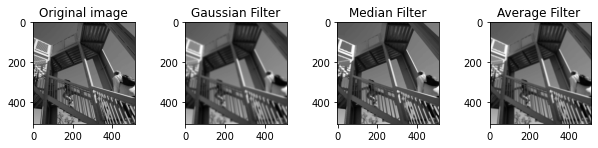

In [ ]:
from scipy import misc
from scipy import ndimage
from pylab import show,title,figure,subplot,subplots_adjust, imshow

image           = misc.ascent()                             # load input image
Gaussian_filter = ndimage.gaussian_filter(image, sigma = 3) # gaussian filter with standard deviation = 3
median_filter   = ndimage.median_filter(image, size = 7)    # median filter with kernel size of 7
kernel          = np.ones(shape=(6,6))/18                   # define kernel for average filter, kernel size is 6
average_filter  = ndimage.convolve (image, kernel)          # average filter 

"displaying original image, results from gaussian, median and average filters"

h,w=1,4    # figure height and width 
figure(figsize=(10,10));subplots_adjust(hspace=0.2,wspace=0.5)
subplot(h,w,1);imshow(image, cmap='gray');title('Original image')
subplot(h,w,2);imshow(Gaussian_filter, cmap='gray');title('Gaussian Filter')
subplot(h,w,3);imshow(median_filter, cmap='gray');title('Median Filter')
subplot(h,w,4);imshow(average_filter , cmap='gray');title('Average Filter ')
show()

#### Example 4: Edge Enhancement 
Enhancing edge of an image using [prewitt function](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt)

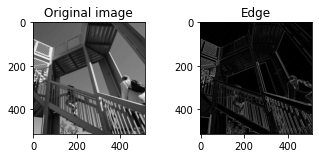

In [ ]:
from scipy import misc
from skimage.filters import prewitt
from pylab import show,title,figure,subplot,subplots_adjust, imshow

image  = misc.ascent()      # load input image
Edge   = prewitt (image)   # find edge

h,w=1,2                   # figure height and width 
figure(figsize=(5,5));subplots_adjust(hspace=0.5, wspace=0.5)
subplot(h,w,1);imshow(image, cmap='gray');title('Original image')
subplot(h,w,2);imshow(Edge, cmap='gray');title('Edge')
show()

#### Exercise 2
To illustrate image filtering we will try to restore an image, obtained by distorting Brain.tiff with Salt and Pepper noise (Brain_noise_SnP.tiff).
In the first part of the exercise, we will focus on Gaussian smoothing. Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Read input image (Brain.tiff)
- Read noisy image (Brain_noise_SnP.tiff)
- Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Calculate the difference image of the input noisy image with the obtained filtered image. The difference you obtain is the filtered noise.
- Calculate the difference image of the obtained filtered image with the provided ground truth (Brain.tiff). The difference you obtain is the noise that remained after filtering (Unfiltered noise).
- Create a simple edge map of the obtained filtered image using the [edge function and prewitt mask](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt).
- Display input image, noisy image, gaussian filtered image, filtered noise and unfiltered noise. 

#### Report
- Repeat the process, for a [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) for a kernel of size 3 and an average filter using a kernel of size 3. For the average filter you will have to create your own filter kernel.
- Calculate the [root mean squared differences (RMSD)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) of the pixels of the obtained filtered images with those of the ground truth. RMSD is a frequently used measure of the differences between values. Hint: RMSD = [sqrt](https://www.tutorialspoint.com/python/number_sqrt.htm) ([mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (input image, filtered image))
- Display a three-by-four plot with the filtered images obtained using the different filters, the filtered noise, the noise that remained after the filtering (unfiltered) and the edge maps of the filtered image.
- Provide all three values for the RMSD between filtered image and the ground truth.
- Comment briefly on the results.
- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?
- Which filter works best in terms of RMSD and why?
- Which filter preserves the edges the best?

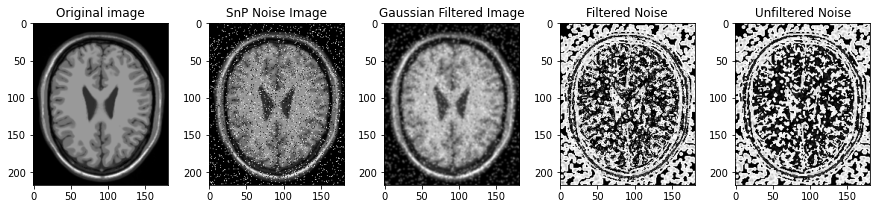

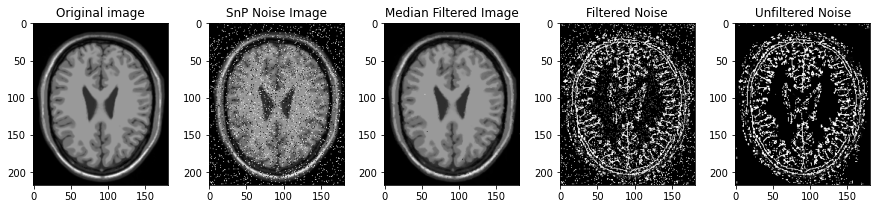

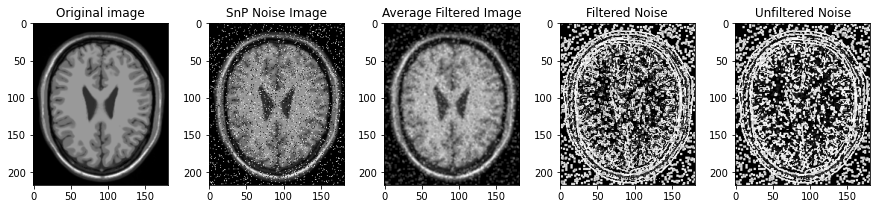

In [4]:
#!pip install imread
#from google.colab import files
#import cv2
#uploaded = files.upload()
from math import sqrt
from skimage import data, img_as_float, filters
#import matplotlib.pyplot as plt
from imread import imread
import scipy as sp
from scipy import ndimage
import numpy as np
from pylab import show,title,figure,imshow,subplot,subplots_adjust
from sklearn.metrics import mean_squared_error
from skimage.filters import prewitt
#![](https://drive.google.com/uc?export=view&id=1WPTfeBr8pPDW1k2LC1rFhiNN1_6Et0o3)
#uploaded = files.upload()

brain = imread('Brain.tiff')
brain_noise_SnP = imread('Brain_noise_SnP.tiff')

###########GAUSSIAN FLITER####################################
Gaussian_filter_image = ndimage.gaussian_filter(brain_noise_SnP, sigma = 1)
filtered_noise_gaussian = brain_noise_SnP - Gaussian_filter_image
unfiltered_noise_gaussian = brain - Gaussian_filter_image
edges_gaussian = filters.prewitt(Gaussian_filter_image)
#imshow(edges)
h,w=1,5 
figure(figsize=(15,15));subplots_adjust(wspace=0.3)
subplot(h,w,1);imshow(brain, cmap='gray');title('Original image')
subplot(h,w,2);imshow(brain_noise_SnP, cmap='gray');title('SnP Noise Image')
subplot(h,w,3);imshow(Gaussian_filter_image, cmap='gray');title('Gaussian Filtered Image')
subplot(h,w,4);imshow(filtered_noise_gaussian , cmap='gray');title('Filtered Noise')
subplot(h,w,5);imshow(unfiltered_noise_gaussian , cmap='gray');title('Unfiltered Noise')
show()
RMSD_gaussian = sqrt(mean_squared_error(brain, Gaussian_filter_image))
###########MEDIAN FLITER####################################
median_filter_image = ndimage.median_filter(brain_noise_SnP, size=3)
filtered_noise_median = brain_noise_SnP - median_filter_image
unfiltered_noise_median = brain - median_filter_image
edges_median = filters.prewitt(median_filter_image)
h,w=1,5 
figure(figsize=(15,15));subplots_adjust(wspace=0.3)
subplot(h,w,1);imshow(brain, cmap='gray');title('Original image')
subplot(h,w,2);imshow(brain_noise_SnP, cmap='gray');title('SnP Noise Image')
subplot(h,w,3);imshow(median_filter_image, cmap='gray');title('Median Filtered Image')
subplot(h,w,4);imshow(filtered_noise_median , cmap='gray');title('Filtered Noise')
subplot(h,w,5);imshow(unfiltered_noise_median , cmap='gray');title('Unfiltered Noise')
show()
RMSD_median = sqrt(mean_squared_error(brain, median_filter_image))
###########AVERAGE FLITER####################################
k = np.ones(shape=(3,3))/9                  
average_filter_image = ndimage.convolve(brain_noise_SnP, k) 
filtered_noise_average = brain_noise_SnP - average_filter_image
unfiltered_noise_average = brain - average_filter_image
edges_average = filters.prewitt(average_filter_image)
h,w=1,5 
figure(figsize=(15,15));subplots_adjust(wspace=0.3)
subplot(h,w,1);imshow(brain, cmap='gray');title('Original image')
subplot(h,w,2);imshow(brain_noise_SnP, cmap='gray');title('SnP Noise Image')
subplot(h,w,3);imshow(average_filter_image, cmap='gray');title('Average Filtered Image')
subplot(h,w,4);imshow(filtered_noise_average , cmap='gray');title('Filtered Noise')
subplot(h,w,5);imshow(unfiltered_noise_average , cmap='gray');title('Unfiltered Noise')
show()
RMSD_average = sqrt(mean_squared_error(brain, average_filter_image))

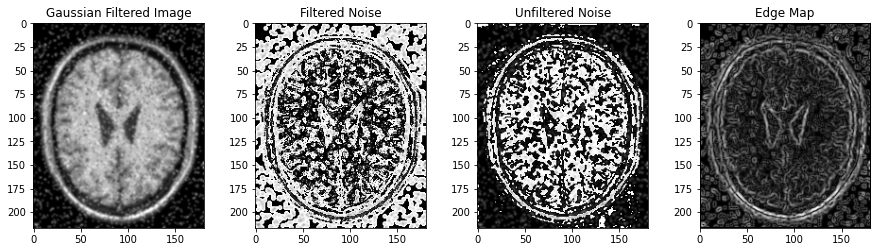

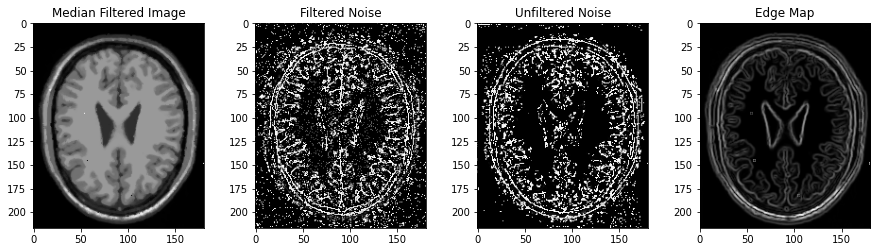

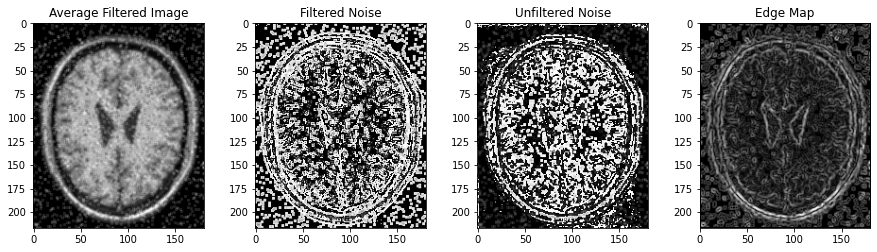


RMSD(Guassian)= 8.100817 
RMSD(Median)= 3.404882 
RMSD(Average)= 7.286397


In [ ]:
h,w=3,4
figure(figsize=(15,15));subplots_adjust(wspace=0.3)
subplot(h,w,1);imshow(Gaussian_filter_image, cmap='gray');title('Gaussian Filtered Image')
subplot(h,w,2);imshow(filtered_noise_gaussian , cmap='gray');title('Filtered Noise')
subplot(h,w,3);imshow(unfiltered_noise_gaussian , cmap='gray');title('Unfiltered Noise')
subplot(h,w,4);imshow(edges_gaussian , cmap='gray');title('Edge Map')

figure(figsize=(15,15));subplots_adjust(wspace=0.3)
subplot(h,w,5);imshow(median_filter_image, cmap='gray');title('Median Filtered Image')
subplot(h,w,6);imshow(filtered_noise_median , cmap='gray');title('Filtered Noise')
subplot(h,w,7);imshow(unfiltered_noise_median , cmap='gray');title('Unfiltered Noise')
subplot(h,w,8);imshow(edges_median , cmap='gray');title('Edge Map')

figure(figsize=(15,15));subplots_adjust(wspace=0.3)
subplot(h,w,9);imshow(average_filter_image, cmap='gray');title('Average Filtered Image')
subplot(h,w,10);imshow(filtered_noise_average , cmap='gray');title('Filtered Noise')
subplot(h,w,11);imshow(unfiltered_noise_average , cmap='gray');title('Unfiltered Noise')
subplot(h,w,12);imshow(edges_average , cmap='gray');title('Edge Map')
show()

print("\nRMSD(Guassian)= %f \nRMSD(Median)= %f \nRMSD(Average)= %f" %(RMSD_gaussian, RMSD_median, RMSD_average))

Comment: It is clear that median filter has the best performance.
 The difference image with the ground truth means unfiltered noises are still exist, so when subtracting, unfiltered noises removed and the rest would be filtered noises. As for the difference image with the original input image, two images should be the same and actually the result of subtraction would ideally be zero(a totally black image), but we see there are white dots, that is there are noises which are not filtered.
The less RMSD, the better filter. Actually as mentioned, this difference should be zero but in reality, it can't be. As the images illustrate, the median filter is the best with the lowest RMSD. 
It can be clearly seen from the edge map images that median filter preserve edges much better than the other filters.   

### 3 Image segmentation
Segmentation is the task of defining the boundaries of an object or region in an image. It is often used for measuring size or volume of organs or other tissues of interest. A multitude of different methods exist and the optimal choice of segmentation method is highly dependent on the region to be segmented, and the type and quality of the input image.
#### 3.1 Thresholding
Image thresholding is the simplest and fastest segmentation method. The process comes down to defining one or more boundaries of intensity in the im- age histogram. Pixels with intensity within the boundaries will get mapped to 1 (inside), while others are considered background. The process can be extended to multiple labels using multiple (upper and lower) boundaries.
Thresholding can be done by manually selecting the boundaries, or automatically, by optimizing the boundary values with respect to a certain criterion. For instance, Otsu thresholding will automatically select boundaries that maximize the between class variance of two or more regions.
#### 3.2 Region Growing
Region growing is an iterative segmentation approach in which an initial region (usually a single seed point) is grown by including its neighbouring pixels if they fulfil certain requirements.
In its simplest form, region growing is closely related to thresholding, mainly using the image intensity to drive the algorithm. The algorithm has the benefit of taking into account spatial connectivity, thereby enabling to limit the segmentation to connected regions.
#### 3.3 Dice Coefficient
A common way to evaluate segmentations is to compare the obtained object S, with the reference or ground truth R provided by physicians after manual segmentations. A popular measure for quantitative evaluation is computing the Dice coefficient D, which compares the volumes (|.|) of the overlap of both objects to average volume,

\begin{equation*}
D(S,R)= \frac{ 2|S∩R|} { |S| + |R|}
\end{equation*}



#### Example 5: [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) 

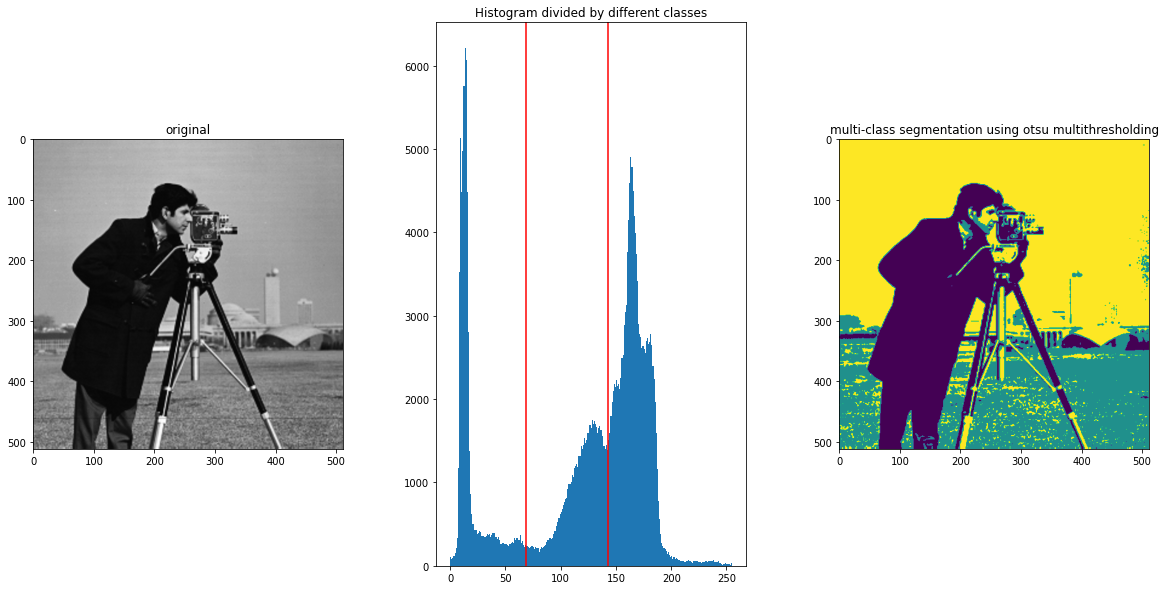

In [ ]:
import numpy as np
from skimage import data
from skimage.filters import threshold_multiotsu
from pylab import show,title,figure,subplot,subplots_adjust, imshow, hist,axvline

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, 3, nbins=255)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

h,w=1,3                    # figure height and width 
figure(figsize=(20,10));subplots_adjust(hspace=0.3, wspace=0.3)

subplot(h,w,1)
imshow(image, cmap='gray');title('original')

subplot(h,w,2)
hist(image.ravel(), bins=255, histtype = 'bar');title('Histogram divided by different classes')
for thresh in thresholds:
    axvline(thresh, color='r')
    
subplot(h,w,3)
imshow(regions);title('multi-class segmentation using otsu multithresholding')
show()
#b0 = regions==0;imshow(b0,'gray');title('Background');show();
            #b1 = regions==1;imshow(b1,'gray');title('Ventricles');show();
           # b2 = regions==2;imshow(b2,'gray');title('Gray matter');show();
           # b3 = regions==3;imshow(b3,'gray');title('White matter');show();

#### Exercise 3.1 [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) for segmenting ventricles and white matter.
By following the example 5, solve exercise 3.1:

- Read input image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
- Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Plot the histogram and the four thresholds obtained from [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py), result of multi-class segmentation using [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) and different four regions. Hint for plotting four different regions: 
                  b0 = regions==0;imshow(b0,'gray');title('Background');show();
                  b1 = regions==1;imshow(b1,'gray');title('Ventricles');show();
                  b2 = regions==2;imshow(b2,'gray');title('Gray matter');show();
                  b3 = regions==3;imshow(b3,'gray');title('White matter');show();
- Calculate Dice coeffient between segmented ventricals (b1) and groundtruth image for ventricals segmentation (GroundTruthVentricles[:,:,0])
- Calculate Dice coeffient between segmented gray matter (b3) and groundtruth image for white matter segmentation (grndTruthWM1[:,:,0])

- Dice coefficient function: 
    
     def dice_coeff(im1,im2):
         im1 = im1.astype(np.bool)
         im2 = im2.astype(np.bool)
         intersect = np.logical_and(im1,im2)
         return 2*intersect.sum()/(im1.sum() + im2.sum())

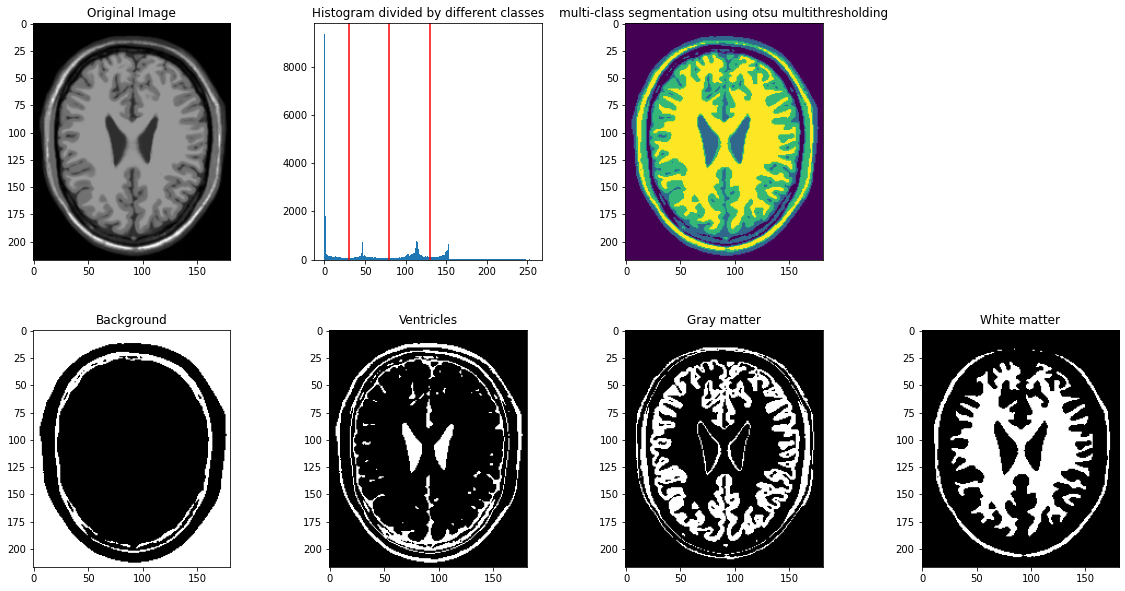

In [ ]:
#!pip install imread
#from google.colab import files
#import cv2
#uploaded = files.upload()
from skimage import data, img_as_float, filters
from skimage.filters import threshold_multiotsu
from imread import imread
import scipy as sp
from scipy import ndimage
import numpy as np
from pylab import show,title,figure,imshow,subplot,subplots_adjust,axvline,hist
from sklearn.metrics import mean_squared_error
from skimage.filters import prewitt
#![](https://drive.google.com/uc?export=view&id=1WPTfeBr8pPDW1k2LC1rFhiNN1_6Et0o3)

brain = imread('Brain.tiff')
ground_truth_ventricle = imread('GroundTruthVentricles.tiff')
ground_truth_white = imread('grndTruthWM1.tiff')

thresholds = threshold_multiotsu(brain,4, nbins=255)
regions = np.digitize(brain, bins=thresholds)

h,w=2,4                  
figure(figsize=(20,10));subplots_adjust(hspace=0.3, wspace=0.3)

subplot(h,w,1)
imshow(brain, cmap='gray');title('Original Image')

subplot(h,w,2)
hist(brain.ravel(), bins=255, histtype = 'bar');title('Histogram divided by different classes')
for thresh in thresholds:
    axvline(thresh, color='r')
    
subplot(h,w,3)
imshow(regions);title('multi-class segmentation using otsu multithresholding')

subplot(h,w,5)
b0 = regions==0;imshow(b0,'gray');title('Background');
subplot(h,w,6)
b1 = regions==1;imshow(b1,'gray');title('Ventricles');
subplot(h,w,7)
b2 = regions==2;imshow(b2,'gray');title('Gray matter');
subplot(h,w,8)
b3 = regions==3;imshow(b3,'gray');title('White matter');
show()

def dice_coeff(im1,im2):
  im1 = im1.astype(np.bool)
  im2 = im2.astype(np.bool)
  intersect = np.logical_and(im1,im2)
  return 2*intersect.sum()/(im1.sum() + im2.sum())

dice_coefficient_b1 = dice_coeff(b1, ground_truth_ventricle)
dice_coefficient_b3 = dice_coeff(b3, ground_truth_white[:,:,0])

#### Exercise 3.2 Region Growing Segmentation 
You should note that in the previous exercise it was not possible to separate the ventricles or white matter from some other structures completely. In this exercise will attempt to do this by implementing a region growing algorithm in its simplest form.
The algorithm should output a binary image with pixel values 1 for the structure under study and 0 for all other pixels. As an input it should use one or two threshold values that were obtained from the previous exercise and a seed point. 

To select your seeds for the region growing algorithm, inspect the image and find a point coordinate (X,Y) which later will be used as a seed point for your segmentation algorithm. A chosen point location has to be within the structure you are planning to segment.

Using the implemented algorithm, try to segment each of the ventricles and the white matter using suitable seed points and calculate the Dice coefficients with respect to the ground truth images introduced above.

Note: region growing function is given.


##### Ventricles segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- For the first ventricle segmentation
- Step 4. Choose seed point. There are two ventricles, therefore, user has to repeat the process of choosing seed point twice. 
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
                Hint: seg1 = region_growing(Image, seed, thresholds[0], conn=4)
- For the second ventricle segmentation 
- Step 6. Repeat steps 4 and 5
- Step 7. Get final segmentation by adding first and second ventricle segmentations. 
- Step 8. Calculate Dice coefficient between final ventricles segmentation and groundtruth (GroundTruthVentricles[:,:,0]).  

##### White matter segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Step 4. Choose seed point. 
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
                Hint: seg = region_growing(Image, seed, thresholds[0], conn=4)
- Step 6. Calculate Dice coefficient between final ventricles segmentation and groundtruth (grndTruthWM1[:,:,0]).

#### Report 
- For Exercises 3.1 and 3.2 plot a 2-by-2 figure of the segmentations of the ventricles and white matter and their corresponding ground truth.
- Provide a table of the obtained Dice coefficients for each method and each structure.
- Briefly comment on the obtained results for the segmentations and corresponding measures.

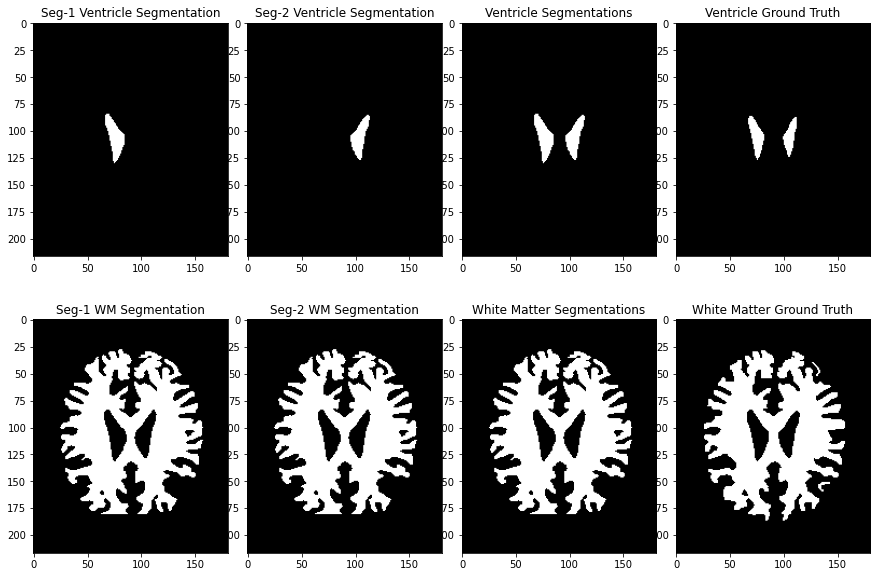

,Method,Dice coefficients,result
0,Multi-Otsu thresholding,b1 & ground truth ventricles,0.183824
1,Multi-Otsu thresholding,b1 & ground truth white,0.848851
2,Region Growing Segmentation,Final seg. of ventricle & ground truth ventricle,0.741026
3,Region Growing Segmentation,Final seg. of white matter & ground truth white,0.906582


In [ ]:
#!pip install imread
#from google.colab import files
#import cv2
#uploaded = files.upload()
from skimage import data, img_as_float, filters
from skimage.filters import threshold_multiotsu
from imread import imread
import scipy as sp
from scipy import ndimage
import numpy as np
from pylab import show,title,figure,imshow,subplot,subplots_adjust,axvline,hist
from sklearn.metrics import mean_squared_error
from skimage.filters import prewitt
import pandas

brain = imread('Brain.tiff')
ground_truth_ventricle = imread('GroundTruthVentricles.tiff')
ground_truth_white = imread('grndTruthWM1.tiff')
thresholds = threshold_multiotsu(brain,4, nbins=255)

seg1_ventricle = region_growing(brain, (70,100), thresholds[0], conn= 4)
seg2_ventricle = region_growing(brain, (110,100), thresholds[0], conn= 4) 
finalSeg_ventricle = seg1_ventricle + seg2_ventricle
dice_ventricleSeg = dice_coeff(finalSeg_ventricle, ground_truth_ventricle)

seg1_WM = region_growing(brain, (70,150), thresholds[0], conn= 4) 
seg2_WM = region_growing(brain, (110,150), thresholds[0], conn= 4)
finalSeg_WM = seg1_WM + seg2_WM
dice_WMSeg = dice_coeff(finalSeg_WM, ground_truth_white[:,:,0])

h,w=2,4                 
figure(figsize=(15,10));subplots_adjust(wspace=0.1)
subplot(h,w,1)
imshow(seg1_ventricle, cmap='gray');title('Seg-1 Ventricle Segmentation')
subplot(h,w,2)
imshow(seg2_ventricle, cmap='gray');title('Seg-2 Ventricle Segmentation')
subplot(h,w,3)
imshow(finalSeg_ventricle, cmap='gray');title('Ventricle Segmentations')
subplot(h,w,4)
imshow(ground_truth_ventricle, cmap='gray');title('Ventricle Ground Truth')
subplot(h,w,5)
imshow(seg1_WM, cmap='gray');title('Seg-1 WM Segmentation')
subplot(h,w,6)
imshow(seg2_WM, cmap='gray');title('Seg-2 WM Segmentation')
subplot(h,w,7)
imshow(finalSeg_WM, cmap='gray');title('White Matter Segmentations')
subplot(h,w,8)
imshow(ground_truth_white, cmap='gray');title('White Matter Ground Truth')
show()

frd = pandas.DataFrame({  
    'Method'   : ['Multi-Otsu thresholding',
                  'Multi-Otsu thresholding',
                  'Region Growing Segmentation',
                  'Region Growing Segmentation'],
    'Dice coefficients' : ['b1 & ground truth ventricles' ,
                           'b1 & ground truth white',
                           'Final seg. of ventricle & ground truth ventricle',
                           'Final seg. of white matter & ground truth white'],
    'result' : [dice_coefficient_b1,
                dice_coefficient_b3, 
                dice_ventricleSeg,
                dice_WMSeg]})

print()
frd

In [ ]:
#%matplotlib notebook
import numpy as np 
import matplotlib 
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pylab as plt
from imread import imread
from skimage.filters import threshold_multiotsu 

### Region growing segmentation function

def region_growing(img, seed, threshold, conn):
    dims = img.shape
        
    
    # Connectivity 
    if conn == 2:
        orient = [(1, 0), (0, 1)] # 2 connectivity
    elif conn == 4:
        orient = [(1, 0), (0, 1), (-1, 0), (0, -1)] # 4 connectivity
    elif conn == 8:
        orient = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)] # 8 connectivity
    
    reg = np.zeros(dims)
  

    #parameters
    mean_reg = float(img[seed[1], seed[0]])
    size = 1
    pix_area = dims[0]*dims[1]

    contour = [] # will be [ [[x1, y1], val1],..., [[xn, yn], valn] ]
    contour_val = []
    dist = 0

    cur_pix = [seed[0], seed[1]]

    #Spreading
    while(dist<threshold and size<pix_area):
    #adding pixels
        for j in range(len(orient)):
            #select new candidate
            temp_pix = [cur_pix[0] +orient[j][0], cur_pix[1] +orient[j][1]]

            #check if it belongs to the image
            is_in_img = dims[0]>temp_pix[0]>0 and dims[1]>temp_pix[1]>0 #returns boolean
            #candidate is taken if not already selected before
            if (is_in_img and (reg[temp_pix[1], temp_pix[0]]==0)):
                contour.append(temp_pix)
                contour_val.append(img[temp_pix[1], temp_pix[0]] )
                reg[temp_pix[1], temp_pix[0]] = 2
        #add the nearest pixel of the contour in it
        dist_list = [abs(i - mean_reg) for i in contour_val ]
        dist = min(dist_list)    #get min distance
        index = dist_list.index(min(dist_list)) #mean distance index
        size += 1 # updating region size
        reg[cur_pix[1], cur_pix[0]] = 255

        #updating mean MUST BE FLOAT
        mean_reg = (mean_reg*size + float(contour_val[index]))/(size+1)
        #updating seed
        cur_pix = contour[index]

        #removing pixel from neigborhood
        del contour[index]
        del contour_val[index]       

    return reg

Comment: According to the dice coeffient definition, the more dice coefficient we obtain, the better segmentation we do. So, as the table of dice coefficient shows, both methods gain satisfying segmentation for the white matter part, but as for ventricles, the result of region growing is far better than the one of thresholding method. Therefore, we can conclude the segment we want to do segmentation on plays the key role for choosing the method, like if the segment would be the small part of the whole image, region growing method is better choice, otherwise thresholding method would be optimistic because of not only satisfying result but time cost. We can consider this in the other way like if the segment is a part of the image, which is not continueos here like ventricles, the region growing method would be the best choice.   